In [1]:
#importing all the libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf

In [2]:
#reading the csv file 
ipl = pd.read_csv("ipl_data.csv")
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
#data preprocessing 

#dropping unimportant features
df = ipl.drop(['date','runs','wickets','overs','runs_last_5', 'wickets_last_5', 'mid', 'striker', 'non-striker'], axis = 1)

In [4]:
#further preprocessing

X = df.drop(['total'], axis = 1)
y = df['total']

In [5]:
#applying label encoding in categorical features in X

from sklearn.preprocessing import LabelEncoder

#create a label encoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()


#fitting and transforming the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

In [6]:
#train - test splitting the data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [7]:
#perfroming the feature scaling over here

# Scaling - is performed to ensure consistent scale to improve model performance.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#fitting the scaler on the training data and transform both training and testing data

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [8]:
# defining the neural network using sequential with a double hidden layer

model = keras.Sequential([
    keras.layers.Input(shape = (X_train_scaled.shape[1],)),
    #input layer
    keras.layers.Dense(512, activation = 'relu'),
    #hidden layer with 512 units and relu activation 
    keras.layers.Dense(256, activation = 'relu'),
    #hidden layer with 256 units and relu activation
    keras.layers.Dense(1, activation = 'linear')
    #output the layer with linear activation for regression    
])

#compile the model with huber loss

huber_loss = tf.keras.losses.Huber(delta = 1.0)
#you can adjust the delta parameter as needed

model.compile(optimizer = 'adam', loss = huber_loss)
#use huber loss for regression

In [9]:
# training the model 

model.fit(X_train_scaled, y_train, epochs = 50, batch_size = 64, validation_data = (X_test_scaled, y_test))

Epoch 1/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - loss: 56.4583 - val_loss: 22.0521
Epoch 2/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - loss: 22.3300 - val_loss: 22.0533
Epoch 3/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 22.2732 - val_loss: 22.0618
Epoch 4/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - loss: 22.2065 - val_loss: 22.0081
Epoch 5/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - loss: 22.1597 - val_loss: 21.8965
Epoch 6/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - loss: 22.2012 - val_loss: 21.9403
Epoch 7/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - loss: 22.2438 - val_loss: 21.8219
Epoch 8/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - loss: 22.1442 - val_loss: 22.1167
Epoch 9/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - loss: 22.1389 - val_loss: 21.8357
Epoch 10/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - loss: 22.0703 - val_loss: 21.8737
Epoch 11/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - loss: 22.2471 - val_loss: 21.7866
Epoch 12

<Axes: >

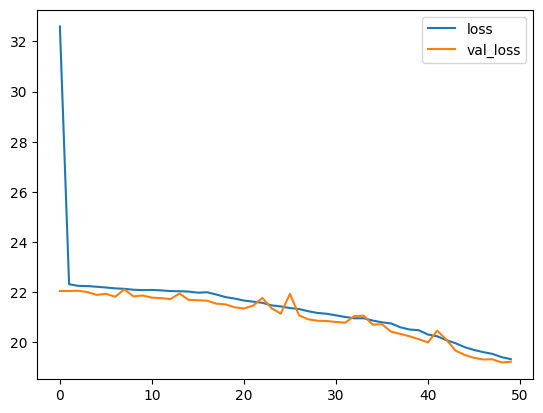

In [10]:
#  After the training, we have stored the training and validation loss values to our neural network during the training process

model_losses = pd.DataFrame(model.history.history)

model_losses.plot()

In [11]:
# model evaluation

predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(y_test, predictions)

# predictions

713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


19.722999594165056

In [20]:
#creating a widget through which you could interact
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings('ignore')

venue = widgets.Dropdown(options = df['venue'].unique().tolist(),description = 'Select Venue :')
batting_team = widgets.Dropdown(options = df['bat_team'].unique().tolist(), description = 'Select Batting Team : ')
bowling_team = widgets.Dropdown(options = df['bowl_team'].unique().tolist(), description = 'Select Bowling Team : ')
striker = widgets.Dropdown(options = df['batsman'].unique().tolist(), description = 'Select Striker : ')
bowler = widgets.Dropdown(options = df['bowler'].unique().tolist(), description = 'Select Bowler : ')

predict_button = widgets.Button(description = 'Predict Score')


def predict_score(b):
    with output:
        clear_output() #clearing the previous output
        
        
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])
        
        
        decoded_feature5 = ... # Compute or get the fifth feature value
        input = np.array([decoded_venue, decoded_batting_team, decoded_bowling_team, decoded_bowler, decoded_feature5])
        input = input.reshape(1, 5)

        input = np.array([decoded_venue, decoded_batting_team, decoded_bowling_team, decoded_bowler])
        input = input.reshape(1, 5)
        input = scaler.transform(input)
        
        #print(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])
        
        print(predicted_score)


In [21]:
import ipywidgets as widgets
from IPython.display import display


In [22]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)

Dropdown(description='Select Venue :', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, …

Dropdown(description='Select Batting Team : ', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajas…

Dropdown(description='Select Bowling Team : ', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Del…

Dropdown(description='Select Striker : ', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Mo…

Dropdown(description='Select Bowler : ', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', '…

Button(description='Predict Score', style=ButtonStyle())

Output()